# Analysing the trust and safety scores of people on police of chicago

In [1]:
pip install sodapy

  Using cached sodapy-2.2.0-py2.py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt

The data is used from Police Sentiment Records - Chicago Data Portal

In [4]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

#returned as JSON from API / converted to Python list of dictionaries by sodapy.
#limit of 7266 because thats the number of rows 

results = client.get("28me-84fj",limit = 7266)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head(5)

,org_level,city,area,district,sector,safety,s_race_african_american,s_race_asian_american,s_race_hispanic,s_race_white,...,t_respect_sex_female,t_respect_sex_male,t_respect_education_low,t_respect_education_medium,t_respect_education_high,t_respect_income_low,t_respect_income_medium,t_respect_income_high,start_date,end_date
0,Other,chicago,area_1,2,210,57.54,54.8,64.48,45.86,81.63,...,59.53,77.46,65.43,61.53,74.63,58.9,57.61,84.76,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
1,Other,chicago,area_1,2,220,54.89,50.43,64.57,50.86,75.33,...,53.33,65.35,64.08,55.66,60.26,52,60.27,69.43,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
2,Other,chicago,area_1,2,230,57.63,58.82,64.91,44,62.59,...,53.75,57.47,45.51,59.49,54.42,53.02,55.19,63.99,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
3,Other,chicago,area_1,2,NaN,56.69,54.68,64.65,46.9,73.18,...,55.54,66.76,58.34,58.89,63.1,54.64,57.69,72.73,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000
4,Other,chicago,area_1,3,310,53.57,54.06,71.54,53.97,64.19,...,50.97,54.51,49.67,53.56,73.36,50.52,50.32,72.66,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000


In [9]:
np.shape(results_df)

(7266, 77)

In [10]:
results_df.columns

Index(['org_level', 'city', 'area', 'district', 'sector', 'safety',
       's_race_african_american', 's_race_asian_american', 's_race_hispanic',
       's_race_white', 's_race_other', 's_age_low', 's_age_medium',
       's_age_high', 's_sex_female', 's_sex_male', 's_education_low',
       's_education_medium', 's_education_high', 's_income_low',
       's_income_medium', 's_income_high', 'trust', 't_race_african_american',
       't_race_asian_american', 't_race_hispanic', 't_race_white',
       't_race_other', 't_age_low', 't_age_medium', 't_age_high',
       't_sex_female', 't_sex_male', 't_education_low', 't_education_medium',
       't_education_high', 't_income_low', 't_income_medium', 't_income_high',
       't_listen', 't_listen_race_african_american',
       't_listen_race_asian_american', 't_listen_race_hispanic',
       't_listen_race_white', 't_listen_race_other', 't_listen_age_low',
       't_listen_age_medium', 't_listen_age_high', 't_listen_sex_female',
       't_listen_

In [11]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   org_level                        7266 non-null   object
 1   city                             7266 non-null   object
 2   area                             7044 non-null   object
 3   district                         6461 non-null   object
 4   sector                           4899 non-null   object
 5   safety                           7266 non-null   object
 6   s_race_african_american          7266 non-null   object
 7   s_race_asian_american            7266 non-null   object
 8   s_race_hispanic                  7266 non-null   object
 9   s_race_white                     7266 non-null   object
 10  s_race_other                     7266 non-null   object
 11  s_age_low                        7266 non-null   object
 12  s_age_medium                     7

In [8]:
#seperating year and month in the data for further use
results_df['Year'] = pd.to_datetime(results_df['start_date']).dt.year
results_df['month'] = pd.to_datetime(results_df['start_date']).dt.month
results_df


,org_level,city,area,district,sector,safety,s_race_african_american,s_race_asian_american,s_race_hispanic,s_race_white,...,t_respect_education_low,t_respect_education_medium,t_respect_education_high,t_respect_income_low,t_respect_income_medium,t_respect_income_high,start_date,end_date,Year,month
0,Other,chicago,area_1,2,210,57.54,54.8,64.48,45.86,81.63,...,65.43,61.53,74.63,58.9,57.61,84.76,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
1,Other,chicago,area_1,2,220,54.89,50.43,64.57,50.86,75.33,...,64.08,55.66,60.26,52,60.27,69.43,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
2,Other,chicago,area_1,2,230,57.63,58.82,64.91,44,62.59,...,45.51,59.49,54.42,53.02,55.19,63.99,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
3,Other,chicago,area_1,2,NaN,56.69,54.68,64.65,46.9,73.18,...,58.34,58.89,63.1,54.64,57.69,72.73,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
4,Other,chicago,area_1,3,310,53.57,54.06,71.54,53.97,64.19,...,49.67,53.56,73.36,50.52,50.32,72.66,2023-09-01T00:00:00.000,2023-09-30T00:00:00.000,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,Other,chicago,area_5,25,2540,52.46,41.11,30.37,51.85,59.83,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11
7262,Other,chicago,area_5,25,2550,51.06,46.58,43.7,42.96,65.56,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11
7263,Other,chicago,area_5,25,NaN,54.3,44.58,37.04,51.49,64.11,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11
7264,Other,chicago,area_5,NaN,NaN,62.06,55.91,53.19,58.44,66.01,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01T00:00:00.000,2017-11-30T00:00:00.000,2017,11


In [34]:
#We see different area and sectors in the given data
#Average safety and trust count of public in different sectors
results_df['safety'] = results_df['safety'].astype(float)
results_df['trust'] = results_df['trust'].astype(float)
results_df['t_respect'] = results_df['t_respect'].astype(float)
results_df.mean(numeric_only=True)

#ignore year and month value here in the output.

safety         58.058293
trust          59.621062
t_respect      61.243598
Year         2020.180017
month           6.447564
dtype: float64

# Displaying safety and trust averages of districts and areas 

In [127]:
# a temperory data frame
df2 = results_df[['area',
    'safety',
    'trust',
]].copy()
df2.head(3)

,area,safety,trust
0,area_1,57.54,62.10
1,area_1,54.89,55.74
2,area_1,57.63,54.63


In [99]:
#average trust and safety scores of people residing in different areas and districts.

scores_area = df2.groupby('area')
scores_area.mean()
# scores_area.dtypes

,trust,safety
area,,
CENTRAL,59.008026,62.060526
NORTH,62.039605,65.635526
SOUTH,54.330658,58.353816
area_1,55.680195,54.189014
area_2,55.307150,54.615982
area_3,65.456963,62.555211
area_4,51.689274,51.366273
area_5,65.637908,62.766599


The representation of average trust and safety score across different areas of the chicago city 

Text(0, 0.5, 'Average Safety and trust Score')

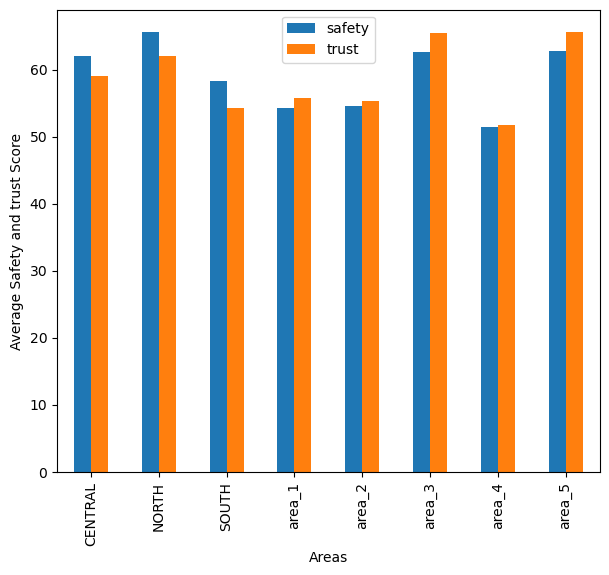

In [129]:
#definign labels
mylabels = ['safety', 'trust']

#plotting the pivot_table with area as index and safety and trust as values
df_pivot = pd.pivot_table(
	df2,
	values= mylabels,
	index="area",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Areas")
ax.set_ylabel("Average Safety and trust Score")


# Observation:

North of chicago is the safest average people feel in the city. Whereas, area 5 has the most trust on the protection provide by the police. 

Area_1 has people concerned with their safety and would prefer trusting police.

Also, area 4 has the least figures obesrved both in terms of police trust and safety for their neighbourhood.

What about different people of various communitites? 
Do they feel the exact same way?
What about gender roles?

In [140]:
results_df["s_sex_female"] = pd.to_numeric(results_df.s_sex_female, errors='coerce')
results_df["s_sex_male"] = pd.to_numeric(results_df.s_sex_male, errors='coerce')
df_gender = results_df[[ 'area',
    's_sex_female',
    's_sex_male',
    'Year'
   
]].copy()
df_gender.dtypes

area             object
s_sex_female    float64
s_sex_male      float64
Year              int32
dtype: object

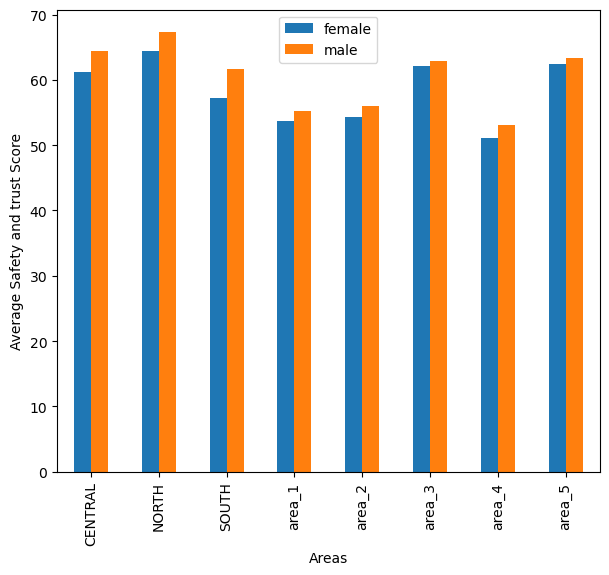

In [150]:
#definign labels
mylabels = ['s_sex_female', 's_sex_male']

#plotting the pivot_table with area as index and safety and trust as values
df_pivot = pd.pivot_table(
	df_gender,
	values= mylabels,
	index="area",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Areas")
ax.set_ylabel("Average Safety and trust Score")
ax.legend(labels = ['female','male'])

It is observed that males feel more secure and reliable on police in all the area.
Also the highest average for female safety is observed in North even though its less than men. 
Area 4 still shows a general trend of male and females feeling less secure in the neighbourhood.

## Different Race and their average scores over the years.

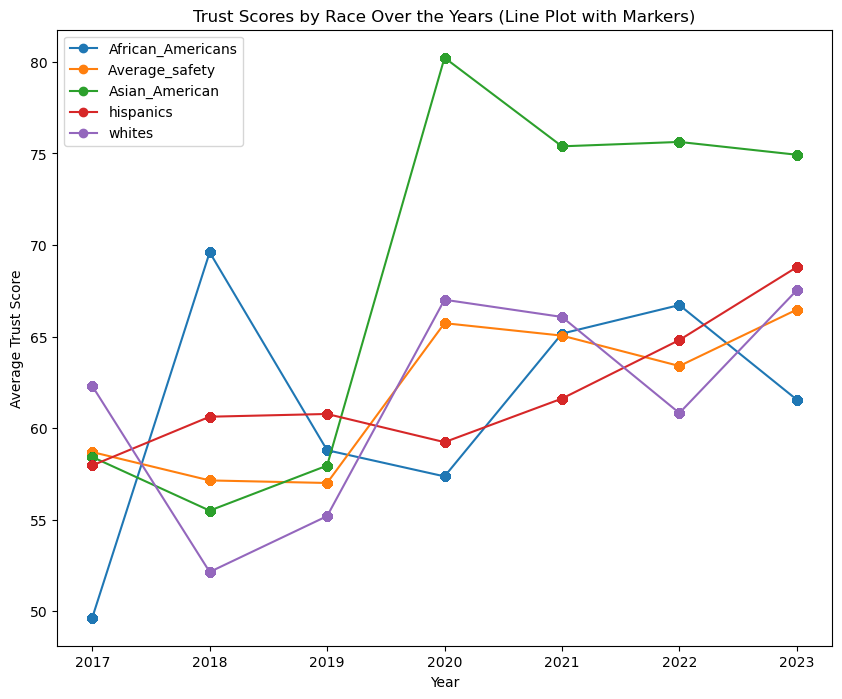

In [195]:
# safety scores of african american, asian american, whites, hispanic over the years
results_df["safety"] = pd.to_numeric(results_df.safety, errors='coerce')
results_df["s_race_african_american"] = pd.to_numeric(results_df.s_race_african_american, errors='coerce')
results_df["s_race_asian_american"] = pd.to_numeric(results_df.s_race_asian_american, errors='coerce')
results_df["s_race_hispanic"] = pd.to_numeric(results_df.s_race_hispanic, errors='coerce')
results_df["s_race_white"] = pd.to_numeric(results_df.s_race_white, errors='coerce')

# t_race_white
s = pd.DataFrame({
    'African_Americans' : results_df["s_race_african_american"],
    'Average_safety ': results_df['safety'],
    'Asian_American' : results_df["s_race_asian_american"],
    'hispanics' : results_df["s_race_hispanic"],
    'whites': results_df["s_race_white"]
        }, index = results_df['Year'])

# Plot the data using a line plot with markers
ax = s.plot.line(marker='o', figsize=(10, 8))

# Set plot title and labels
plt.title('Trust Scores by Race Over the Years (Line Plot with Markers)')
plt.xlabel('Year')
plt.ylabel('Average Trust Score')

# Show the plot
plt.show()

In [198]:
results_df["trust"] = pd.to_numeric(results_df.trust, errors='coerce')
results_df["t_race_african_american"] = pd.to_numeric(results_df.t_race_african_american, errors='coerce')
results_df["t_race_asian_american"] = pd.to_numeric(results_df.t_race_asian_american, errors='coerce')
results_df["t_race_hispanic"] = pd.to_numeric(results_df.t_race_hispanic, errors='coerce')
results_df["t_race_white"] = pd.to_numeric(results_df.t_race_white, errors='coerce')

# t_race_white
trust_race = pd.DataFrame({
    'African_Americans'  : results_df["t_race_african_american"],
    'Average_trust ': results_df['trust'],
    'Asian_American' : results_df["t_race_asian_american"],
    'hispanics' : results_df["t_race_hispanic"],
    'whites': results_df["t_race_white"]
        }, index = results_df['Year'])


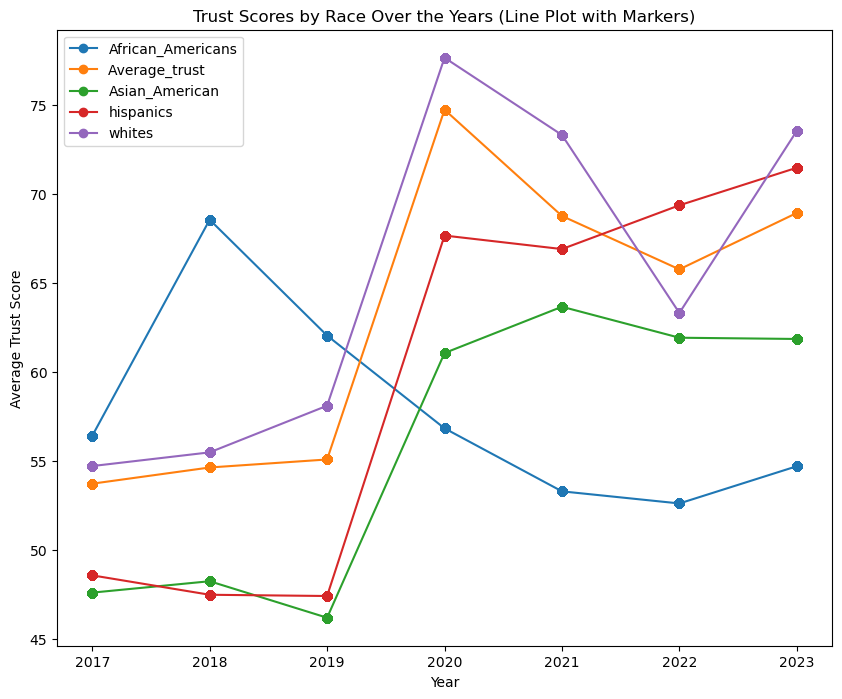

In [199]:
# Plot the data using a line plot with markers
ax = trust_race.plot.line(marker='o', figsize=(10, 8))

# Set plot title and labels
plt.title('Trust Scores by Race Over the Years (Line Plot with Markers)')
plt.xlabel('Year')
plt.ylabel('Average Trust Score')

# Show the plot
plt.show()

In [ ]:
The trust and safety scores of different races have changes over the years in very different
manner. 
This could be because of various reasons.
We could further analyze the data in the future and combine it with other available datasets
to get an accurate answer.

In [ ]:
# I dont have data on number of people living in the particular area or the participating 
# sample. 
# The gather data set i worked on has just average scores of people on trusting police and 
# feeling secure in the neighbourhood.
# with my dataset cant predict if the people living in diffrent areas have a particular type 
# of race or income levels or education obtained.